In [27]:
# Class name: AI1811
# Student code: HE181685
# Student name: Nguyễn Thành Trung
# Subject: CPV301-LAB3

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, feature, io, exposure

In [31]:
## Hiển thị hình ảnh ban đầu 
# Đọc hình ảnh từ đường dẫn 
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
image = cv2.imread(image_path)

# Kiểm tra nếu hình ảnh được tải thành công
if image is None:
    print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
else:
    # Hiển thị hình ảnh
    cv2.imshow('Loaded Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


In [ ]:
## Function 1: Harris corner detector
#Tạo hàm
def harris_corner_detector(image_path, k=0.04, threshold=0.01):
    # Đọc hình ảnh
    img = cv2.imread(image_path)
    
    # Kiểm tra nếu hình ảnh được tải thành công
    if img is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Đổi ảnh sang thang độ xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Tính gradients
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Tính tích các gradients
    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy
    
    # Áp dụng Gaussian
    Ixx = cv2.GaussianBlur(Ixx, (5, 5), 1)
    Iyy = cv2.GaussianBlur(Iyy, (5, 5), 1)
    Ixy = cv2.GaussianBlur(Ixy, (5, 5), 1)
    
    # Tính Harris response
    detM = Ixx * Iyy - Ixy ** 2
    traceM = Ixx + Iyy
    R = detM - k * (traceM ** 2)
    
    # Thresholding
    corners = np.zeros_like(R)
    corners[R > threshold * R.max()] = 255
    
    # Loại bỏ điểm không phải cực đại
    corners = cv2.dilate(corners, None)
    
    # Tạo các góc trên ảnh gốc
    img[corners == 255] = [0, 0, 255]
    
    return img

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
result = harris_corner_detector(image_path)
if result is not None:
    cv2.imshow('Harris Corners', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [5]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, exposure, feature

def compute_hog(image_path):
    # Đọc hình ảnh
    image = io.imread(image_path)
    # Kiểm tra nếu hình ảnh được tải thành công
    if image is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    # Chuyển đổi sang thang độ xám
    gray_image = color.rgb2gray(image)
    
    # Tính toán HOG
    hog_features, hog_image = feature.hog(gray_image, 
                                          orientations=9, 
                                          pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), 
                                          block_norm='L2-Hys', 
                                          visualize=True)
    
    # Tái tỉ lệ biểu đồ để hiển thị ảnh tốt hơn 
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    # Chuyển đổi hình ảnh HOG sang định dạng uint8
    hog_image_rescaled = (hog_image_rescaled * 255).astype('uint8')
    
    # Hiển thị hình ảnh gốc và hình ảnh HOG bằng OpenCV
    cv2.imshow('Origi', gray_image)
    cv2.imshow('Hình ảnh HOG', hog_image_rescaled)
    
    # Đợi người dùng nhấn phím bất kỳ để đóng cửa sổ
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
compute_hog(image_path)


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


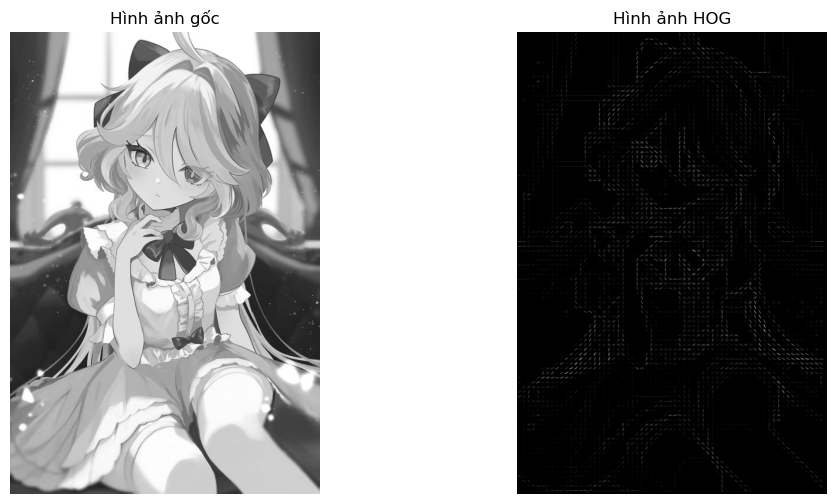

In [37]:
## Function 2: HOG( Hiển thị hình ảnh HOG sử dụng matplotlib)
# Tạo hàm
def compute_hog(image_path):
    # Đọc hình ảnh
    image = io.imread(image_path)
    # Kiểm tra nếu hình ảnh được tải thành công
    if image is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    # Chuyển đổi sang thang độ xám
    gray_image = color.rgb2gray(image)
    
    # Tính toán HOG
    hog_features, hog_image = feature.hog(gray_image, 
                                          orientations=9, 
                                          pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), 
                                          block_norm='L2-Hys', 
                                          visualize=True)
    
    # Hiển thị hình ảnh gốc và hình ảnh HOG
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    
    ax1.axis('off')
    ax1.imshow(gray_image, cmap=plt.cm.gray)
    ax1.set_title('Hình ảnh gốc')
    
    # tái tỉ lệ biểu đồ để hiển thị ảnh tốt hơn 
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Hình ảnh HOG')

    plt.show()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
compute_hog(image_path)


In [39]:
## Function 3: Canny Operator
# Tạo hàm 
def canny_edge_detector(image_path, low_threshold=50, high_threshold=150):
    # Đọc hình ảnh
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Kiểm tra nếu hình ảnh được tải thành công
    if img is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Áp dụng bộ lọc Gaussian
    blurred_img = cv2.GaussianBlur(img, (5, 5), 1.4)
    
    # Áp dụng Canny Edge Detection
    edges = cv2.Canny(blurred_img, low_threshold, high_threshold)
    
    # Hiển thị hình ảnh gốc và Canny Edges
    cv2.imshow('Original Image', img)
    cv2.imshow('Canny Edges', edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
canny_edge_detector(image_path)


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg


In [41]:
## Function 4: Hough transform
# Tạo hàm
def detect_rectangles(image_path):
    # Đọc hình ảnh
    img = cv2.imread(image_path)
    
    # Kiểm tra nếu hình ảnh được đọc thành công
    if img is None:
        print(f"Lỗi: không thể tải hình ảnh ở {image_path}")
        return
    
    # Đổi ảnh sang thang độ xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Phát hiện cạnh bằng Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Áp dụng Hough Transform 
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # Hiển thị hình ảnh với các đường thẳng được phát hiện
    cv2.imshow('Detected Lines', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sử dụng hàm
image_path = input("Nhập đường dẫn đến tệp hình ảnh: ")
detect_rectangles(image_path)


Nhập đường dẫn đến tệp hình ảnh:  C:/Users/pagmas.saint/Downloads/461747979_122181436802086679_5889038662929067671_n.jpg
